In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/facial_expression/fer2013

/content/drive/MyDrive/facial_expression/fer2013


In [ ]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [ ]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
basemodelNoDropout = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
basemodelNoNorm = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        #tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        #tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
basemodelNone = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        #tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        #tf.keras.layers.BatchNormalization(),
                                        #tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
basemodel.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
basemodelNoDropout.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
basemodelNoNorm.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
basemodelNone.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)
print(checkpoint_path)
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

checkpoint/best_model.h5


In [ ]:
from keras import callbacks
filename='model_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepath = os.path.join('checkpoint', filename)

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [ ]:
from keras import callbacks
filenameNoDropout='model_train_newNoDropout.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepathNoDropout = os.path.join('checkpoint', filenameNoDropout)

csv_logNoDropout=callbacks.CSVLogger(filenameNoDropout, separator=',', append=False)
checkpointNoDropout = callbacks.ModelCheckpoint(filepathNoDropout, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_listNoDropout = [csv_logNoDropout,checkpointNoDropout]
callbacks_listNoDropout = [csv_logNoDropout]

In [ ]:
from keras import callbacks
filenameNoNorm='model_train_newNoNorm.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepathNoNorm = os.path.join('checkpoint', filenameNoNorm)

csv_logNoNorm=callbacks.CSVLogger(filenameNoNorm, separator=',', append=False)
checkpointNoNorm = callbacks.ModelCheckpoint(filepathNoNorm, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_listNoNorm = [csv_logNoNorm,checkpointNoNorm]
callbacks_listNoNorm = [csv_logNoNorm]

In [ ]:
from keras import callbacks
filenameNone='model_train_newNone.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepathNone = os.path.join('checkpoint', filenameNone)

csv_logNone=callbacks.CSVLogger(filenameNone, separator=',', append=False)
checkpointNone = callbacks.ModelCheckpoint(filepathNone, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_listNone = [csv_logNone,checkpointNone]
callbacks_listNone = [csv_logNone]

In [ ]:
hist = basemodel.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) ,callbacks=checkpoint)

Epoch 1/50
1010/1010 [==============================] - 50s 20ms/step - loss: 2.0872 - accuracy: 0.2852 - val_loss: 1.6138 - val_accuracy: 0.3998

Epoch 00001: val_accuracy improved from -inf to 0.39983, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 2/50
1010/1010 [==============================] - 20s 20ms/step - loss: 1.7308 - accuracy: 0.3766 - val_loss: 1.5234 - val_accuracy: 0.4466

Epoch 00002: val_accuracy improved from 0.39983 to 0.44664, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 3/50
1010/1010 [==============================] - 20s 20ms/step - loss: 1.5760 - accuracy: 0.4196 - val_loss: 1.3995 - val_accuracy: 0.4753

Epoch 00003: val_accuracy improved from 0.44664 to 0.47534, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 4/50
1010/1010 [

In [ ]:
histNoDropout = basemodelNoDropout.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) ,callbacks=checkpointNoDropout)

Epoch 1/50
1010/1010 [==============================] - 20s 19ms/step - loss: 1.6117 - accuracy: 0.4091 - val_loss: 1.4207 - val_accuracy: 0.4675

Epoch 00001: val_accuracy improved from -inf to 0.46754, saving model to checkpoint/model_train_newNoDropout.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNoDropout.csv/assets
Epoch 2/50
1010/1010 [==============================] - 19s 19ms/step - loss: 1.2452 - accuracy: 0.5372 - val_loss: 1.3101 - val_accuracy: 0.5071

Epoch 00002: val_accuracy improved from 0.46754 to 0.50711, saving model to checkpoint/model_train_newNoDropout.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNoDropout.csv/assets
Epoch 3/50
1010/1010 [==============================] - 19s 19ms/step - loss: 1.0479 - accuracy: 0.6142 - val_loss: 1.2676 - val_accuracy: 0.5336

Epoch 00003: val_accuracy improved from 0.50711 to 0.53357, saving model to checkpoint/model_train_newNoDropout.csv
INFO:tensorflow:Assets written to: checkpoint/mode

In [ ]:
histNoNorm = basemodelNoNorm.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) ,callbacks=checkpointNoNorm)

Epoch 1/50
1010/1010 [==============================] - 19s 18ms/step - loss: 1.8044 - accuracy: 0.2561 - val_loss: 1.6959 - val_accuracy: 0.3271

Epoch 00001: val_accuracy improved from -inf to 0.32711, saving model to checkpoint/model_train_newNoNorm.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNoNorm.csv/assets
Epoch 2/50
1010/1010 [==============================] - 18s 18ms/step - loss: 1.6059 - accuracy: 0.3759 - val_loss: 1.5351 - val_accuracy: 0.4054

Epoch 00002: val_accuracy improved from 0.32711 to 0.40541, saving model to checkpoint/model_train_newNoNorm.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNoNorm.csv/assets
Epoch 3/50
1010/1010 [==============================] - 18s 18ms/step - loss: 1.4797 - accuracy: 0.4283 - val_loss: 1.4342 - val_accuracy: 0.4489

Epoch 00003: val_accuracy improved from 0.40541 to 0.44887, saving model to checkpoint/model_train_newNoNorm.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNoNo

In [ ]:
histNone = basemodelNone.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) ,callbacks=checkpointNone)

Epoch 1/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.3886 - accuracy: 0.4736 - val_loss: 1.3618 - val_accuracy: 0.4650

Epoch 00001: val_accuracy improved from -inf to 0.46503, saving model to checkpoint/model_train_newNone.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNone.csv/assets
Epoch 2/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.2844 - accuracy: 0.5119 - val_loss: 1.2906 - val_accuracy: 0.5040

Epoch 00002: val_accuracy improved from 0.46503 to 0.50404, saving model to checkpoint/model_train_newNone.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNone.csv/assets
Epoch 3/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.1998 - accuracy: 0.5487 - val_loss: 1.2462 - val_accuracy: 0.5163

Epoch 00003: val_accuracy improved from 0.50404 to 0.51630, saving model to checkpoint/model_train_newNone.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newNone.csv/asset

<Figure size 432x288 with 0 Axes>

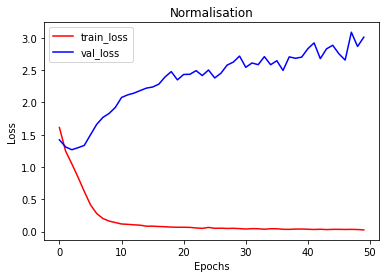

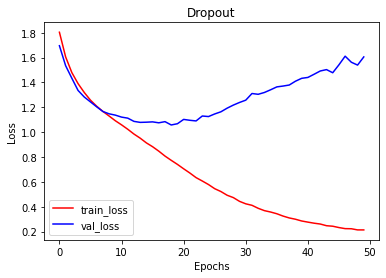

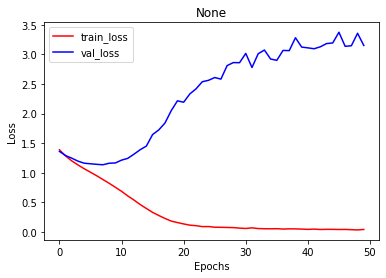

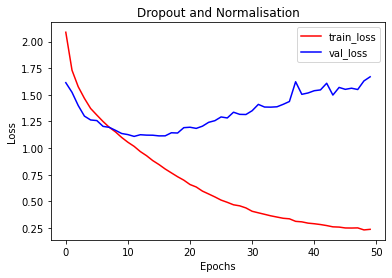

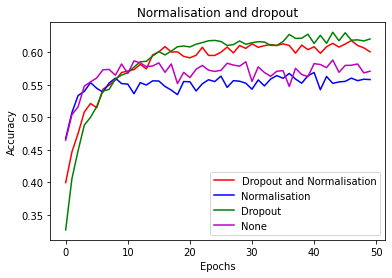

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']

train_lossNoDropout=histNoDropout.history['loss']
val_lossNoDropout=histNoDropout.history['val_loss']
train_accNoDropout=histNoDropout.history['accuracy']

train_lossNoNorm=histNoNorm.history['loss']
val_lossNoNorm=histNoNorm.history['val_loss']
train_accNoNorm=histNoNorm.history['accuracy']

train_lossNone=histNone.history['loss']
val_lossNone=histNone.history['val_loss']
train_accNone=histNone.history['accuracy']

val_acc=hist.history['val_accuracy']
bval_acc=histNoDropout.history['val_accuracy']
cval_acc=histNoNorm.history['val_accuracy']
dval_acc=histNone.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_lossNoDropout,'r', label='train_loss')
pyplot.plot(epochs,val_lossNoDropout,'b', label='val_loss')
pyplot.title('Normalisation')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,train_lossNoNorm,'r', label='train_loss')
pyplot.plot(epochs,val_lossNoNorm,'b', label='val_loss')
pyplot.title('Dropout')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,train_lossNone,'r', label='train_loss')
pyplot.plot(epochs,val_lossNone,'b', label='val_loss')
pyplot.title('None')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('Dropout and Normalisation')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,val_acc,'r', label='Dropout and Normalisation')
pyplot.plot(epochs,bval_acc,'b', label='Normalisation')
pyplot.plot(epochs,cval_acc,'g', label='Dropout')
pyplot.plot(epochs,dval_acc,'m', label='None')
pyplot.title('Normalisation and dropout')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()